# CAPSTONE PROJECT 

# RESTAURANT RATING CLASSIFICATION USING NLP

# SOWNDARIYA M 
## PGAA 02

# Problem Statement

A friendly foodie community in Bengaluru formed by 20 students has
conducted a survey on Food Restaurant reviews. With the analysis of the
survey, the community came to know that many restaurant owners are willing
to know their customer’s opinion in terms of the ratings given by them but most
of them are not willing to know their customer’s opinion in terms of reviews.
Usually few customers give only review, few give only rating and few give
both review and rating. The foodie community has collected all the raw data
from restaurant managers and they have promised to help them in knowing the
rating incase if customer has given only a review.

# Goal/Objective

Assume you are one among the 20 members of the community and you want
to make their job easier in helping restaurant managers, build a classification
model which predicts the rating based on the customer reviews and other
parameters.

# Data Description

Data is collected from multiple restaurants around the city of Bengaluru.


# Attribute Information

1. Restaurant_Name: Consists of restaurant name.
2. Reviewer_Name: Name of the customer who gave review.
3. Review_Text: Actual body of the review.
4. Rating(1 - 5): Target variable ranges from 1 to 5.
5. Reviews & Followers: Gives count of reviews and followers.
6. Time: Time the review has given.
7. Pictures_uploaded: How many food and restaurant pictures the
customer has uploaded along with a review

# Files Provided

- Training_Data: Should be used to feed your model.
- Testing_Data: Should be used to generate results.

# Evaluation Criteria

The evaluation metric for this problem statement is the Accuracy Score.

# AIM:


##      TO PREDICT THE MOVIE RATING OF RESTAURANTS IN BANGALORE DEPENDS ON REVIEW TEXT

# OVERVIEW:



1. **[IMPORTING LIBRARIES](#import_lib)**
2. **[Loading Data](#load_data)**
3. **[Feature Engineering](#feature)**
4. **[Exploratory Data Analysis](#eda)**
5. **[NLP Techniques](#nlp)**
    - 5.1 - Tokenization
    - 5.2 - Cleaning Text
    - 5.3 - Stemming
    - 5.4 - Bag of words
      - 5.3.1 - Count Vectorizer
      - 5.3.2 - TF-IDF
6. **[Label Encoding](#label)**
7. **[Target Variable Visualization](#target)**
8. **[Model Building with imbalanced dataset Using LOGISTIC, RANDOM FOREST, XGB CLASSSIFIER, MULTINOMIAL NB( LOGISTIC gave better ACCURACY than others)](#base)**
9. **[Handling imbalanced dataset using Oversampling technique(Random Oversampler)](#oversampler)**
10. **[Model Building with Balanced Dataset Using LOGISTIC, RANDOM FOREST, XGB CLASSSIFIER, MULTINOMIAL NB( RANDOM FOREST gave better ACCURACY than others)](#over_rf)**
11. **[Test data](#test)**
    - 11.1 - Data Preprocessing
    - 11.2 - NLP Techniques
12. **[Using Best Classifier to predict the test data - Random Forest](#rf)**
13. **[Creating Dataframe with review text and predicted ratings](#df)**
14. **[Exporting Dataframe to csv](#export)**
15. **[System Environment](#env)**

<a id='import_lib'></a>
# 1.IMPORTING LIBRARIES

In [9]:
#'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices.
import numpy as np
#‘Pandas’ is used for data manipulation and analysis.
import pandas as pd
#'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy.
import matplotlib.pyplot as plt
#suppress warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
# regular expression - to search for patterns in text
import re 

#The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). 
import nltk 
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
nltk.download('stopwords')
from nltk.corpus import stopwords
#Stemming is used in information retrieval systems like search engines. It is used to determine domain vocabularies in domain analysis.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowndariya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# train test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets.
from sklearn.model_selection import train_test_split
# To Converts group of words into a matrix, showing each words frequency
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

# import libraries for building model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#metrics evaluation
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report,cohen_kappa_score


<a id='load_data'></a>
# 2.LOADING DATA

In [13]:
# read excel file using pandas
df = pd.read_excel('Foodie_Community_Train.xlsx')

In [14]:
# display the top 5 rows of the dataframe
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0


# 3.READ DATA

### Lets take a glance at our dataframe and see how it looks

### Dimensions of the data

In [15]:
# 'shape' function gives the total number of rows and columns in the data
df.shape

(6400, 7)

In [16]:
# CHECKING DATATYPES, NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant_Name      6400 non-null   object        
 1   Reviewer_Name        6400 non-null   object        
 2   Review_Text          6396 non-null   object        
 3   Rating(1 - 5)        6400 non-null   object        
 4   Reviews & Followers  6400 non-null   object        
 5   Time                 6400 non-null   datetime64[ns]
 6   Pictures_uploaded    6400 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 350.1+ KB


### Comment:
+ we can observe that Review_Text having 4 null values

In [17]:
# summary of categorical variables
df.describe(include=object)

# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers
count,6400,6400,6396,6400,6400
unique,80,5068,6047,10,1884
top,Behrouz Biryani,Parijat Ray,good,5,1 Review
freq,90,11,152,2482,600


In [18]:
#checking datatypes 
df.dtypes

Restaurant_Name                object
Reviewer_Name                  object
Review_Text                    object
Rating(1 - 5)                  object
Reviews & Followers            object
Time                   datetime64[ns]
Pictures_uploaded               int64
dtype: object

In [19]:
# checking unique value of review and followers and their counts
df['Reviews & Followers'].value_counts()

1 Review                      600
1 Review , 1 Follower         473
2 Reviews , 1 Follower        217
2 Reviews                     171
1 Review , 2 Followers        144
                             ... 
6 Reviews , 95 Followers        1
13 Reviews , 86 Followers       1
1 Review , 78 Followers         1
3 Reviews , 123 Followers       1
90 Reviews , 121 Followers      1
Name: Reviews & Followers, Length: 1884, dtype: int64

In [20]:
# to seperate reviews and followers as seperate columns checking no of observation having 1 review alone
df1 = df[df['Reviews & Followers']=='1 Review']
df1.shape

(600, 7)

In [21]:
# checking observations not having 1 review alone
df2 = df[df['Reviews & Followers']!='1 Review']
df2.shape

(5800, 7)

In [22]:
# verifying the sum of no of 1 review and more than 1 review is equal to the total observations
(df1.shape[0]+df2.shape[0]) == df.shape[0]

True

In [23]:
# To Seperating Reviews and followers from Reviews and Followers split it by ' '
df['review'] = df['Reviews & Followers'].apply(lambda x : x.split(' '))
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded,review
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0,"[1, Review]"
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0,"[8, Reviews, ,, 4, Followers]"
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0,"[1, Review, ,, 1, Follower]"
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3,"[36, Reviews, ,, 2045, Followers]"
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0,"[1, Review, ,, 6, Followers]"


In [1]:
# Seperating Followers from Reviews and Followers
df['Followers'] =  df['review'].apply(lambda x: x[-2] if len(x)>2 else 0 )
df.head()

NameError: name 'df' is not defined

In [25]:
# Seperating Reviews from Reviews and Followers
df['Reviews'] =  df['review'].apply(lambda x: x[0])
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded,review,Followers,Reviews
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0,"[1, Review]",0,1
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0,"[8, Reviews, ,, 4, Followers]",4,8
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0,"[1, Review, ,, 1, Follower]",1,1
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3,"[36, Reviews, ,, 2045, Followers]",2045,36
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0,"[1, Review, ,, 6, Followers]",6,1


In [26]:
# count of review should be in the dtype of int, so converting dtype from object to int
df['Reviews'] = df['Reviews'].astype(int)

In [27]:
# count of followers should be in the dtype of int, so converting dtype from object to int
df['Followers'] = df['Followers'].astype(int)

In [28]:
# we extract the features review and followers, so dropping source features
df.drop(['Reviews & Followers','review'], axis = 1 , inplace = True)

In [29]:
# Target column - rating of the restaurant which containing 1 string value 'like' replace that with mode
df['Rating(1 - 5)'].replace('Like',df['Rating(1 - 5)'].mode()[0], inplace = True)

<a id='feature'></a>
# 3.FEATURE ENGINEERING

In [30]:
# extract various date time components as seperate features
df = df.assign(hour = df.Time.dt.hour, 
                         day = df.Time.dt.day,
                        month = df.Time.dt.month, 
                        year = df.Time.dt.year, 
                        dayofweek = df.Time.dt.dayofweek)

In [31]:
# dropping source column
df.drop('Time', axis = 1, inplace = True)

In [32]:
# extracting new feature meal_of_the_day from hour
def func(x):
    if x>=6 and x<=9:
        return 'breakfast'
    elif x>9 and x<12:
        return 'brunch'
    elif x>=12 and x<=15:
        return 'lunch'
    elif x>15 and x<=18:
        return 'snacks'
    elif x>18 and x<=19:
        return 'supper'
    else:
        return 'dinner'

In [33]:
df['meal_of_the_day'] = df['hour'].apply(func)
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Pictures_uploaded,Followers,Reviews,hour,day,month,year,dayofweek,meal_of_the_day
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4.0,0,0,1,1,18,5,2019,5,dinner
1,Dine O China,Swarn Lata Singh,poor quality,2.0,0,4,8,14,11,8,2018,5,lunch
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1.0,0,1,1,14,2,10,2018,1,lunch
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5.0,3,2045,36,23,18,8,2018,5,dinner
4,KFC,Umesh Gopu,worst,1.0,0,6,1,20,25,7,2018,2,dinner


In [34]:
# Dropping irrelevant columns
df.drop(['Restaurant_Name','Reviewer_Name','hour'], axis=1, inplace = True)

In [35]:
# checking no of unique values in each feature
df.nunique()

Review_Text          6047
Rating(1 - 5)           9
Pictures_uploaded      33
Followers             611
Reviews               211
day                    31
month                  12
year                    4
dayofweek               7
meal_of_the_day         6
dtype: int64

In [36]:
#checking null values
df.isnull().sum()/df.shape[0]

Review_Text          0.000625
Rating(1 - 5)        0.000000
Pictures_uploaded    0.000000
Followers            0.000000
Reviews              0.000000
day                  0.000000
month                0.000000
year                 0.000000
dayofweek            0.000000
meal_of_the_day      0.000000
dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:>

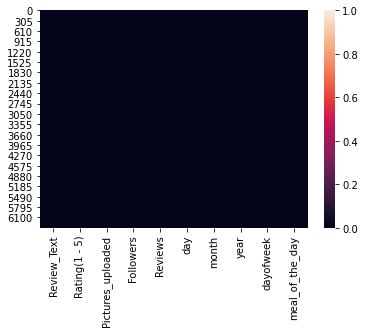

In [37]:
# checking null values by visualising
sns.heatmap(df.isnull())

### Comment :
+ we can see that there is no null values.

<a id='eda'></a>
# 4.EXPLORATORY DATA ANALYSIS

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating(1 - 5)', ylabel='count'>

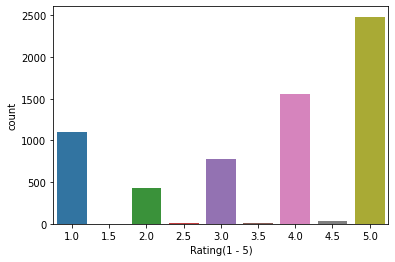

In [38]:
# visualising the target variable
sns.countplot(df['Rating(1 - 5)'])

### Comment :
+ we can observe that restaurants having rating '5'

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating(1 - 5)', ylabel='Reviews'>

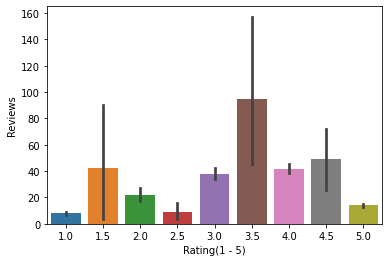

In [39]:
# visualising the target variable
sns.barplot(df['Rating(1 - 5)'],df['Reviews'])

### Comment :
+ we can say that restaurants having 3.5 rating received more reviews.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rating(1 - 5)', ylabel='Followers'>

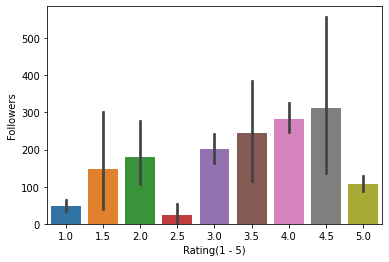

In [40]:
sns.barplot(df['Rating(1 - 5)'],df['Followers'])

### Comment :
+ we can observe that Number of followers more for the restaurant having 4.5 rating.

In [41]:
# checking multicollinearity

<IPython.core.display.Javascript object>

<AxesSubplot:>

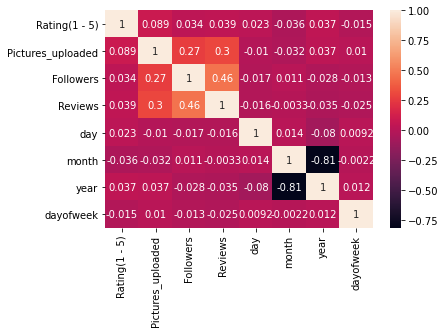

In [42]:
sns.heatmap(df.corr(), annot = True) # we have seen that no high multicollinearity here.

In [43]:
# checking the column names
df.columns

Index(['Review_Text', 'Rating(1 - 5)', 'Pictures_uploaded', 'Followers',
       'Reviews', 'day', 'month', 'year', 'dayofweek', 'meal_of_the_day'],
      dtype='object')

In [44]:
# seperating categorical columns 
df_cat = df.select_dtypes('object')

In [45]:
# seperating numerical columns 
df_num = df.select_dtypes(np.number)

In [46]:
df_cat.columns

Index(['Review_Text', 'meal_of_the_day'], dtype='object')

In [47]:
# dropping review text which is independent variable 
df_cat.drop(['Review_Text'], axis = 1, inplace = True)

In [48]:
df_cat.columns

Index(['meal_of_the_day'], dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='meal_of_the_day', ylabel='count'>

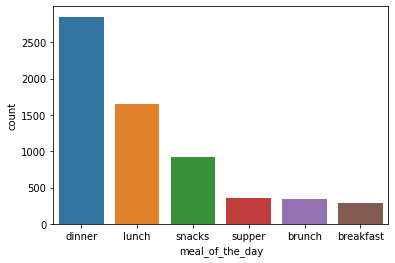

In [49]:
# visualising the meal of the day feature
sns.countplot(df['meal_of_the_day'])

### Comment :
+ Peoples gave reviews for dinner mostly and then lunch compared to others.

In [50]:
# checking the numerical column names
df_num.columns

Index(['Rating(1 - 5)', 'Pictures_uploaded', 'Followers', 'Reviews', 'day',
       'month', 'year', 'dayofweek'],
      dtype='object')

<IPython.core.display.Javascript object>

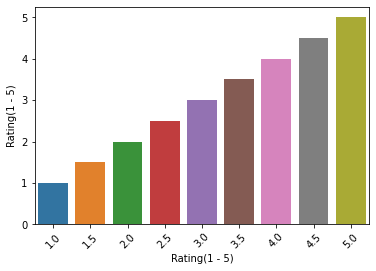

<IPython.core.display.Javascript object>

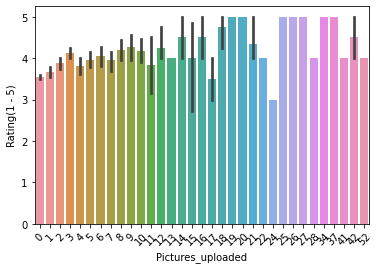

<IPython.core.display.Javascript object>

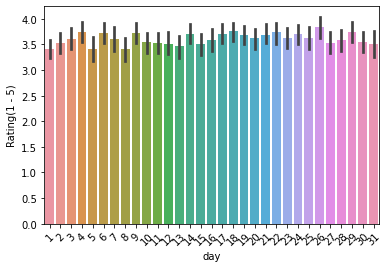

<IPython.core.display.Javascript object>

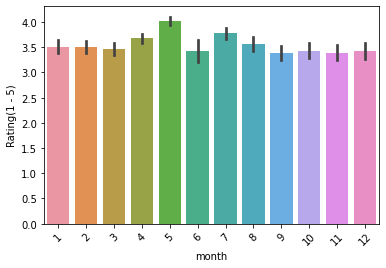

<IPython.core.display.Javascript object>

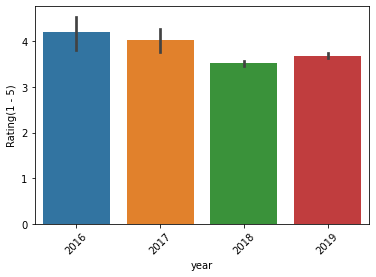

<IPython.core.display.Javascript object>

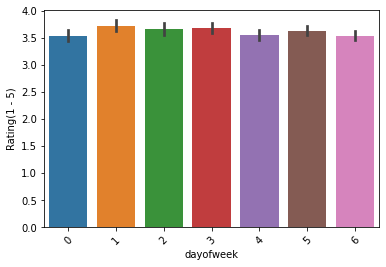

In [51]:
# we already visualized the reviews and followers so getting insights of other features only.
for i in df_num.columns:
    if ((i=='Followers') | (i=='Reviews')):
        continue
    else:
        sns.barplot(df_num[i],df['Rating(1 - 5)'])
        plt.xticks(rotation= 45)
        plt.show()


### Comments:
#### we can observe the followings from the above plot:
+ If Restaurants having more pictures uploaded then their ratings also good.
+ Restaurants got good ratings in second half of month than first half of month.
+ Mid month of a year, restaurants got good ratings compared to others.
+ In 2016 and 2017, restaurant got good ratings compared to 2018 and 2019.
    

In [52]:
# our aim is to predict the rating of restaurant by the reviews so just filter that two columns seperately.
dff = df[['Review_Text', 'Rating(1 - 5)']]

In [53]:
dff.head()

,Review_Text,Rating(1 - 5)
0,"The place was good, ambiance was very nice! Mu...",4.0
1,poor quality,2.0
2,Worst experience with delivery time.. It took ...,1.0
3,What's not to love here ... The best and the m...,5.0
4,worst,1.0


In [54]:
#checking info
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Text    6396 non-null   object 
 1   Rating(1 - 5)  6400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.1+ KB


<a id='nlp'></a>
# 5.NLP TECHNIQUES

- 1. Tokenization - Splitting the senctence into words and making single entities of it
- 2. Cleaning Text - Removing words that don't have significance such as "and,the,is,am,are" and then converting to lower        case and then using Regular Expressions to filter words
- 3. Stemming - Converting each word to its root word is called stemming. For example "go, going, gone" have same root         word "go".
- 4. Bag of Words - Converts group of words into a matrix, showing each words frequency
- 5. Count Vectorizer
- 6. TF-IDF - Term Frequency-Inverse Document Frequency, forms a matrix and shows TF-IDF of each words
 
where,

TF = No. of occurance of a word in a sentence/ No. of words in sentence

IDF = log(No. of sentence/ No. of sentence containing word)

In [55]:
# Data Preprocessing
dff['sentence_lower'] = dff["Review_Text"].str.lower() #cleaning text -  converting text into lower
dff['sentence_no_punctuation'] = dff['sentence_lower'].str.replace('[^\w\s]','')# cleaning text - replace white and non white space characters by ''
dff['sentence_no_punctuation'] = dff["sentence_no_punctuation"].fillna("fillna")# replace null values by fillna

In [56]:
dff.head()

,Review_Text,Rating(1 - 5),sentence_lower,sentence_no_punctuation
0,"The place was good, ambiance was very nice! Mu...",4.0,"the place was good, ambiance was very nice! mu...",the place was good ambiance was very nice musi...
1,poor quality,2.0,poor quality,poor quality
2,Worst experience with delivery time.. It took ...,1.0,worst experience with delivery time.. it took ...,worst experience with delivery time it took 2 ...
3,What's not to love here ... The best and the m...,5.0,what's not to love here ... the best and the m...,whats not to love here the best and the most ...
4,worst,1.0,worst,worst


In [57]:
# Initialize empty array 
# to append clean text  
corpus = []# containing words after removal of stop words
for i in range(0, len(df)):
    review = dff['sentence_no_punctuation'][i].split()# Tokenisation
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]#stemming- removing stop words
    review = ' '.join(review)
    corpus.append(review)

#### Bag of words:

In [58]:
# vectorize the words in corpus using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x = cv.fit_transform(corpus).toarray()
x.shape

(6400, 11531)

In [59]:
# using tfidf for giving weight to the words depends on their no of occurences
tfidf = TfidfTransformer()
X = tfidf.fit_transform(x)
X = tfidf.transform(x)

In [60]:
print('\n The dimension of the sparse matrix : ')
print(X.shape)

#print('\n List of words and their indices in the feature vector : ')
#print(tfidf.vocabulary_)


print('\n TF-IDF of the First Sentence : ')
print(X[0,:])


print('\n TF-IDF of the Second Sentence : ')
print(X[1,:])



 The dimension of the sparse matrix : 
(6400, 11531)

 TF-IDF of the First Sentence : 
  (0, 11144)	0.2574243210855496
  (0, 10532)	0.16452520501762735
  (0, 9832)	0.26443698927994574
  (0, 9815)	0.3028292589482827
  (0, 8686)	0.22010740241215576
  (0, 8506)	0.28497787015224396
  (0, 7789)	0.13588261838739427
  (0, 7234)	0.24798730415291342
  (0, 6900)	0.10766379549517087
  (0, 6764)	0.12168049347340086
  (0, 6745)	0.13793589031855003
  (0, 6043)	0.13909910708087805
  (0, 5982)	0.20593795798471157
  (0, 5699)	0.316828846006599
  (0, 5328)	0.19588457717126298
  (0, 4420)	0.06131351438122478
  (0, 4309)	0.12628164259433072
  (0, 3548)	0.18282462751270562
  (0, 2686)	0.30578844077349154
  (0, 2419)	0.17420956286820807
  (0, 731)	0.13721532561813507
  (0, 709)	0.12103332405502255
  (0, 686)	0.10497106376470941
  (0, 580)	0.2607550449113512

 TF-IDF of the Second Sentence : 
  (0, 8199)	0.5569661117410715
  (0, 7906)	0.8305352192243459


In [61]:
#checking rows and columns
X.shape

(6400, 11531)

In [62]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (6400, 11531)
Amount of Non-Zero occurrences:  149118
Density: 0.20206129130170844


In [63]:
# checking value counts of target variable before label coding
dff['Rating(1 - 5)'].value_counts()

5.0    2483
4.0    1559
1.0    1106
3.0     774
2.0     425
4.5      29
3.5      15
2.5       6
1.5       3
Name: Rating(1 - 5), dtype: int64

In [64]:
#to check the dtype of target variable
dff.dtypes

Review_Text                 object
Rating(1 - 5)              float64
sentence_lower              object
sentence_no_punctuation     object
dtype: object

<a id='label'></a>
# 6.LABEL ENCODING

In [65]:
# target variable is in the form of continuous value, we have to convert that using label encoding
# Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dff['Rating(1 - 5)'])

In [66]:
# checking the encoder classes
list(label_encoder.classes_)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [67]:
# checking unique target variables after encoding
yy = pd.DataFrame(y)
yy.columns = ['rating']
yy['rating'].value_counts() 

8    2483
6    1559
0    1106
4     774
2     425
7      29
5      15
3       6
1       3
Name: rating, dtype: int64

In [68]:
dff['Rating(1 - 5)'].unique() # unique target variables before encoding

array([4. , 2. , 1. , 5. , 3. , 3.5, 4.5, 2.5, 1.5])

<a id='target'></a>
# 7.TARGET VARIABLE VISUALISATION

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='count'>

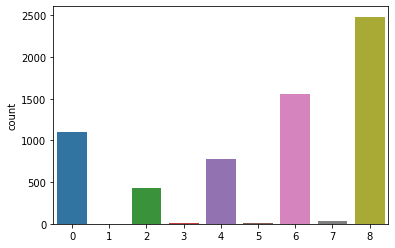

In [69]:
sns.countplot(y)# checking target variable whether it is imbalanced or balanced dataset

### comment:
+ we can conclude that the given data is imbalanced.

<a id='base'></a>

# 8.MODEL BUILDING WITH IMBALANCED DATASET

In [70]:
# splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [71]:
#Creating Result Tabulation
result_tab=pd.DataFrame(columns=['Model_name','Model'])

In [72]:
#Building models and evaluating metrics

models=[LogisticRegression(multi_class='ovr'),MultinomialNB(), RandomForestClassifier(), XGBClassifier()]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print(str(i).upper())
        print()
        
        method=i
        method.fit(x_train,y_train)
        y_pred=method.predict(x_test)
        
        pred_prob1 = method.predict_proba(x_test)
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1,average='weighted',multi_class='ovr'),
                    'Precision Score': metrics.precision_score(y_test, y_pred,average = 'weighted'),
                    'Recall Score': metrics.recall_score(y_test, y_pred, average = 'weighted'),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred,average = 'weighted'),
                    "accuracy_score": accuracy_score(y_pred,y_test),
                   "confusion matrix":confusion_matrix(y_pred,y_test)})
                    #'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    #'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab=result_tab.append(modd,ignore_index=True)
        
    return result_tab


LOGISTICREGRESSION(MULTI_CLASS='OVR')

classification report:                  precision    recall  f1-score   support

           0       0.83      0.63      0.72       272
           1       0.00      0.00      0.00         0
           2       0.02      0.20      0.04        10
           3       0.00      0.00      0.00         0
           4       0.13      0.46      0.20        50
           5       0.00      0.00      0.00         0
           6       0.46      0.47      0.46       288
           7       0.00      0.00      0.00         0
           8       0.88      0.67      0.76       660

    accuracy                           0.60      1280
   macro avg       0.26      0.27      0.24      1280
weighted avg       0.74      0.60      0.66      1280

PPV:  100.0
NPV:  0.0


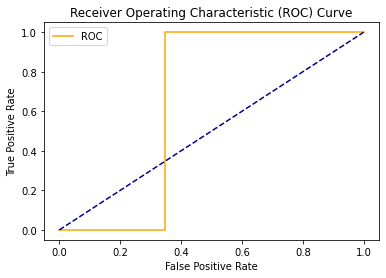


MULTINOMIALNB()

classification report:                  precision    recall  f1-score   support

           0       0.54      0.72      0.62       155
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.35      0.35      0.35       297
           7       0.00      0.00      0.00         0
           8       0.94      0.57      0.71       828

    accuracy                           0.53      1280
   macro avg       0.20      0.18      0.19      1280
weighted avg       0.75      0.53      0.61      1280

PPV:  100.0
NPV:  0.0


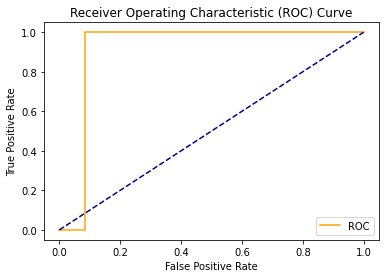


RANDOMFORESTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.83      0.63      0.72       269
           1       0.00      0.00      0.00         0
           2       0.03      0.27      0.06        11
           3       0.00      0.00      0.00         0
           4       0.09      0.71      0.16        24
           5       0.00      0.00      0.00         0
           6       0.39      0.45      0.42       251
           7       0.00      0.00      0.00         0
           8       0.90      0.62      0.74       725

    accuracy                           0.59      1280
   macro avg       0.25      0.30      0.23      1280
weighted avg       0.76      0.59      0.65      1280

PPV:  100.0
NPV:  0.0


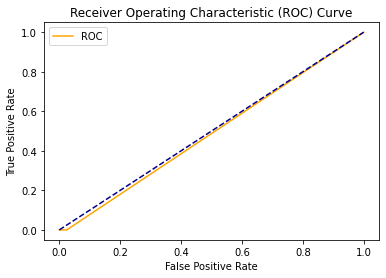


XGBCLASSIFIER(BASE_SCORE=NONE, BOOSTER=NONE, COLSAMPLE_BYLEVEL=NONE,
              COLSAMPLE_BYNODE=NONE, COLSAMPLE_BYTREE=NONE, GAMMA=NONE,
              GPU_ID=NONE, IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=NONE, MAX_DELTA_STEP=NONE, MAX_DEPTH=NONE,
              MIN_CHILD_WEIGHT=NONE, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=NONE, NUM_PARALLEL_TREE=NONE,
              RANDOM_STATE=NONE, REG_ALPHA=NONE, REG_LAMBDA=NONE,
              SCALE_POS_WEIGHT=NONE, SUBSAMPLE=NONE, TREE_METHOD=NONE,
              VALIDATE_PARAMETERS=NONE, VERBOSITY=NONE)

[18:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
classification report:                  precision    re

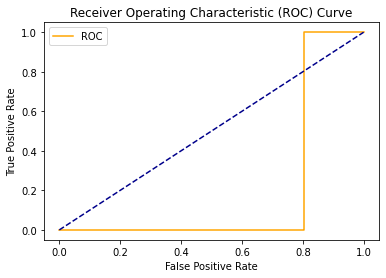

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.839214,0.589063,0.410585,0.567716,0.589063,0.589063,"[[170, 1, 38, 1, 41, 1, 9, 0, 8], [0, 0, 0, 0,...",0.525241
3,base,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481


In [73]:
# base model with imbalanced data
func('base')

In [74]:
# comparing the model accuracy with imbalanced dataset
result_tab

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.839214,0.589063,0.410585,0.567716,0.589063,0.589063,"[[170, 1, 38, 1, 41, 1, 9, 0, 8], [0, 0, 0, 0,...",0.525241
3,base,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481


## Comment:
+ we can conclude that LogisticRegression gave better accuracy compared to others.

<a id='oversampler'></a>

# 9.HANDLING IMBALANCED DATASET USING OVERSAMPLING TECHNIQUE

#### checking the shape of input and output variables before using oversampling technique

In [75]:
X.shape

(6400, 11531)

In [76]:
y.shape

(6400,)

In [78]:
# Using Random Over sampler to make the dataset balanced.
from imblearn.over_sampling import RandomOverSampler
fit_ov = RandomOverSampler()
x_re, y_re = fit_ov.fit_resample(X,y)

#### checking the shape of input and output variables after using oversampling technique

In [79]:
x_re.shape

(22347, 11531)

In [80]:
y_re.shape


(22347,)

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='count'>

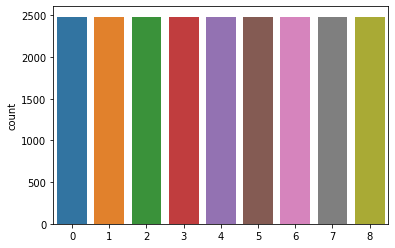

In [81]:
# visualizing target variable after used oversampling technique
sns.countplot(y_re)

### Comment:
+ we can see that every classes having same number of samples.1

<a id='over_rf'></a>
# 10.MODEL BUILDING WITH BALANCED DATASET

In [82]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=1)

LOGISTICREGRESSION(MULTI_CLASS='OVR')

classification report:                  precision    recall  f1-score   support

           0       0.86      0.85      0.85       515
           1       1.00      1.00      1.00       489
           2       0.87      0.79      0.82       537
           3       1.00      1.00      1.00       491
           4       0.73      0.79      0.76       485
           5       1.00      0.98      0.99       494
           6       0.64      0.67      0.66       455
           7       1.00      0.98      0.99       507
           8       0.76      0.77      0.77       497

    accuracy                           0.87      4470
   macro avg       0.87      0.87      0.87      4470
weighted avg       0.88      0.87      0.87      4470

PPV:  100.0
NPV:  100.0


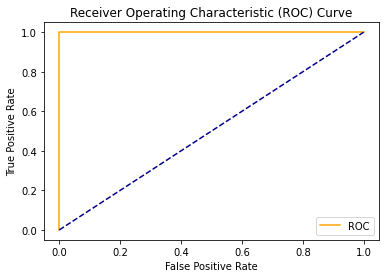


MULTINOMIALNB()

classification report:                  precision    recall  f1-score   support

           0       0.78      0.87      0.82       460
           1       1.00      0.96      0.98       510
           2       0.87      0.74      0.80       575
           3       1.00      0.97      0.98       508
           4       0.66      0.83      0.74       421
           5       1.00      0.95      0.97       511
           6       0.79      0.61      0.69       614
           7       1.00      0.95      0.97       526
           8       0.59      0.86      0.70       345

    accuracy                           0.85      4470
   macro avg       0.85      0.86      0.85      4470
weighted avg       0.87      0.85      0.85      4470

PPV:  99.0074441687345
NPV:  100.0


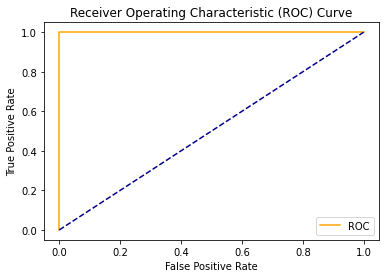


RANDOMFORESTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.95      0.94      0.94       520
           1       1.00      1.00      1.00       489
           2       0.97      0.96      0.97       489
           3       1.00      1.00      1.00       491
           4       0.89      0.96      0.92       495
           5       1.00      1.00      1.00       486
           6       0.76      0.81      0.79       444
           7       1.00      1.00      1.00       498
           8       0.85      0.77      0.80       558

    accuracy                           0.94      4470
   macro avg       0.94      0.94      0.94      4470
weighted avg       0.94      0.94      0.94      4470

PPV:  100.0
NPV:  100.0


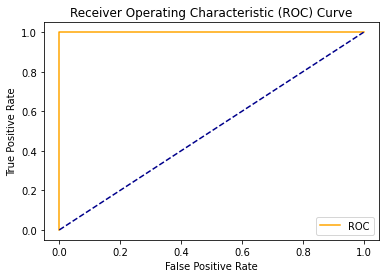


XGBCLASSIFIER(BASE_SCORE=0.5, BOOSTER='GBTREE', COLSAMPLE_BYLEVEL=1,
              COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, GAMMA=0, GPU_ID=-1,
              IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS='',
              LEARNING_RATE=0.300000012, MAX_DELTA_STEP=0, MAX_DEPTH=6,
              MIN_CHILD_WEIGHT=1, MISSING=NAN, MONOTONE_CONSTRAINTS='()',
              N_ESTIMATORS=100, N_JOBS=4, NUM_PARALLEL_TREE=1,
              OBJECTIVE='MULTI:SOFTPROB', RANDOM_STATE=0, REG_ALPHA=0,
              REG_LAMBDA=1, SCALE_POS_WEIGHT=NONE, SUBSAMPLE=1,
              TREE_METHOD='EXACT', VALIDATE_PARAMETERS=1, VERBOSITY=NONE)

[18:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
classification report:                  precision    recall 

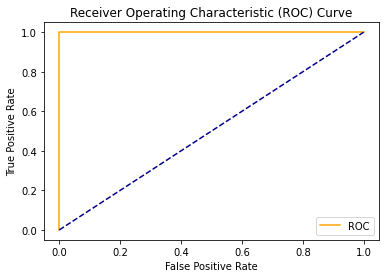

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.839214,0.589063,0.410585,0.567716,0.589063,0.589063,"[[170, 1, 38, 1, 41, 1, 9, 0, 8], [0, 0, 0, 0,...",0.525241
3,base,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481
4,oversampli,LogisticRegression(multi_class='ovr'),0.982002,0.872036,0.856035,0.870814,0.872036,0.872036,"[[438, 0, 26, 0, 35, 0, 9, 0, 7], [0, 489, 0, ...",0.870984
5,oversampli,MultinomialNB(),0.980655,0.852125,0.833717,0.859988,0.852125,0.852125,"[[399, 0, 20, 0, 28, 0, 6, 0, 7], [4, 489, 3, ...",0.849656
6,oversampli,RandomForestClassifier(),0.994544,0.935794,0.927759,0.937161,0.935794,0.935794,"[[487, 0, 5, 0, 14, 0, 5, 0, 9], [0, 489, 0, 0...",0.936032
7,oversampli,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.989864,0.903579,0.891514,0.902951,0.903579,0.903579,"[[467, 0, 12, 0, 30, 0, 11, 0, 17], [0, 489, 0...",0.902942


In [83]:
func('oversampling')

In [84]:
#comparing the result after oversampling
result_tab

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.839214,0.589063,0.410585,0.567716,0.589063,0.589063,"[[170, 1, 38, 1, 41, 1, 9, 0, 8], [0, 0, 0, 0,...",0.525241
3,base,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481
4,oversampli,LogisticRegression(multi_class='ovr'),0.982002,0.872036,0.856035,0.870814,0.872036,0.872036,"[[438, 0, 26, 0, 35, 0, 9, 0, 7], [0, 489, 0, ...",0.870984
5,oversampli,MultinomialNB(),0.980655,0.852125,0.833717,0.859988,0.852125,0.852125,"[[399, 0, 20, 0, 28, 0, 6, 0, 7], [4, 489, 3, ...",0.849656
6,oversampli,RandomForestClassifier(),0.994544,0.935794,0.927759,0.937161,0.935794,0.935794,"[[487, 0, 5, 0, 14, 0, 5, 0, 9], [0, 489, 0, 0...",0.936032
7,oversampli,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.989864,0.903579,0.891514,0.902951,0.903579,0.903579,"[[467, 0, 12, 0, 30, 0, 11, 0, 17], [0, 489, 0...",0.902942


## Comment:
+ we can conclude that "RandomForestClassifier" gave best accuracy score and f1 score compared to other models.

<a id='test'></a>

# 11.TEST

In [85]:
# loading data
test = pd.read_excel('Foodie_Community_Test.xlsx')

In [86]:
test.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Reviews & Followers,Time,Pictures_uploaded
0,Mustang Terrace Lounge,Sirisha Kandula,Could be one of the best place in gachibowli.\...,"1 Review , 1 Follower",2019-05-06 20:34:00,0
1,Shanghai Chef 2,Susmita Basu,I loved the food. Authentic Chinese and nice a...,"17 Reviews , 48 Followers",2018-08-18 15:43:00,4
2,Eat India Company,Ananth Popuri,I love this place in Gachibowli. I have been h...,"12 Reviews , 4 Followers",2019-03-09 15:37:00,0
3,Sardarji's Chaats & More,RAHUL DEY,"Too bad service, does not accept the Order mul...","5 Reviews , 999 Followers",2018-12-07 21:38:00,0
4,Cream Stone,Kiran,ordered nuts overloaded ice cream.fantastic ta...,"11 Reviews , 1 Follower",2018-11-24 13:40:00,0


In [87]:
# checking null values
test.isnull().sum()

Restaurant_Name        0
Reviewer_Name          0
Review_Text            1
Reviews & Followers    0
Time                   0
Pictures_uploaded      0
dtype: int64

In [88]:
# replace null values with its mode
test['Review_Text'].fillna(test['Review_Text'].mode()[0], inplace = True)

In [89]:
# data preprocessing
test['sentence_lower'] = test["Review_Text"].str.lower()
test['sentence_no_punctuation'] = test['sentence_lower'].str.replace('[^\w\s]','')
test['sentence_no_punctuation'] = test["sentence_no_punctuation"].fillna("fillna")

<IPython.core.display.Javascript object>

<AxesSubplot:>

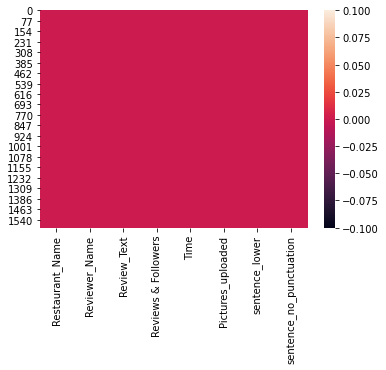

In [90]:
# visualising the null values
sns.heatmap(test.isnull())# we can observe that there is no null values

In [91]:
# Initialize empty array 
# to append clean text  
corpus1 = []
for i in range(0, len(test)):
    review1 = test['sentence_no_punctuation'][i]
    review1 = review1.lower()
    review1 = review1.split()
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    corpus1.append(review1)

In [92]:
test['sentence_no_punctuation']

0       could be one of the best place in gachibowli\n...
1       i loved the food authentic chinese and nice am...
2       i love this place in gachibowli i have been he...
3       too bad service does not accept the order mult...
4        ordered nuts overloaded ice creamfantastic taste
                              ...                        
1595    amazing food anyone who wants to have deliciou...
1596    driven cafe comes with a perfect ambience that...
1597                                                ok ok
1598                                                 good
1599    it was an awesome experiencethe staff speciall...
Name: sentence_no_punctuation, Length: 1600, dtype: object

<a id='rf'></a>
# 12.USING RANDOM FOREST CLASSIFIER TO PREDICT THE RATING (ACCURACY = 93.5)

In [93]:
# Best model
best = RandomForestClassifier()
best.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
# prediction
y_pred = best.predict(x_test)

In [95]:
y_pred

array([4, 7, 6, ..., 2, 8, 5], dtype=int64)

In [96]:
#accuracy score
accuracy_score(y_test,y_pred)

0.9353467561521253

In [97]:
#f1 score
f1_score(y_test,y_pred, average = 'weighted')

0.9355590792365388

In [98]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[490,   0,   6,   0,   3,   0,   1,   0,  11],
       [  0, 489,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0, 471,   0,   2,   0,   0,   0,   9],
       [  0,   0,   0, 491,   0,   0,   0,   0,   0],
       [ 14,   0,   5,   0, 480,   0,  13,   0,  18],
       [  0,   0,   0,   0,   0, 486,   0,   0,   0],
       [  7,   0,   2,   0,   9,   0, 356,   0,  99],
       [  0,   0,   0,   0,   0,   0,   0, 498,   0],
       [  9,   0,   5,   0,   3,   0,  68,   0, 420]], dtype=int64)

In [99]:
#classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       511
           1       1.00      1.00      1.00       489
           2       0.96      0.97      0.97       487
           3       1.00      1.00      1.00       491
           4       0.97      0.91      0.93       530
           5       1.00      1.00      1.00       486
           6       0.81      0.75      0.78       473
           7       1.00      1.00      1.00       498
           8       0.75      0.83      0.79       505

    accuracy                           0.94      4470
   macro avg       0.94      0.94      0.94      4470
weighted avg       0.94      0.94      0.94      4470



In [100]:
test['Review_Text']

0       Could be one of the best place in gachibowli.\...
1       I loved the food. Authentic Chinese and nice a...
2       I love this place in Gachibowli. I have been h...
3       Too bad service, does not accept the Order mul...
4       ordered nuts overloaded ice cream.fantastic ta...
                              ...                        
1595    Amazing food.... Anyone who wants to have deli...
1596    Driven cafe comes with a perfect ambience that...
1597                                                Ok ok
1598                                                 good
1599    it was an awesome experience.....the staff spe...
Name: Review_Text, Length: 1600, dtype: object

In [101]:
# function to predict the rating
def check(msg):
    v = cv.transform([msg])
    prec = best.predict(v)
    return prec

In [102]:
# took 1 sample for testing
check('could be one of the best place in gachibowli\nan underrated place from here you can see the skyline of gachibowlian awesome place\nservice is good value for money')

array([8], dtype=int64)

In [103]:
# predicting rating for all review text in test dataset
pred_text = []
for i in test['sentence_no_punctuation']:
    pred_text.append(check(i))

In [104]:
df_pred_text = pd.DataFrame(pred_text)

In [105]:
df_pred_text.columns = ['Pred']

In [106]:
# take inverse transform for converting the values to its actual form
df_pred_text['Pred'] = label_encoder.inverse_transform(df_pred_text['Pred'])

<a id='df'></a>
# 13.CREATING DATAFRAME WITH REVIEW TEXT AND PREDICTED RATING

In [107]:
# creating dataframe with review and its rating
result=pd.concat([test['Review_Text'],df_pred_text['Pred']],axis=1)

In [108]:
result.head(10)

,Review_Text,Pred
0,Could be one of the best place in gachibowli.\...,5.0
1,I loved the food. Authentic Chinese and nice a...,5.0
2,I love this place in Gachibowli. I have been h...,5.0
3,"Too bad service, does not accept the Order mul...",1.0
4,ordered nuts overloaded ice cream.fantastic ta...,5.0
5,They always deny the table on weekends or Frid...,1.0
6,good,5.0
7,I ordered Afghani chicken from here but I got ...,1.0
8,biryani is good,5.0
9,Ordered chicken dum and received at fine time ...,2.0


In [109]:
result.dtypes

Review_Text     object
Pred           float64
dtype: object

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

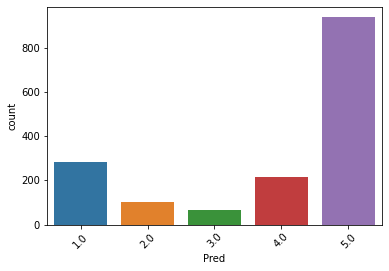

In [110]:
# visualising predicted ratings
pltt = sns.countplot(result['Pred'])
plt.xticks(rotation=45)

## Comment:
+ Test dataset contains mostly reviews belongs to rating '5.0'

In [111]:
result['Pred'].unique()

array([5., 1., 2., 3., 4.])

<a id="export"></a>
# 14.EXPORTING AS CSV

In [112]:
# export the result to csv
report_to_csv=result.to_csv('C:\\Users\\sowndariya\\Desktop\\PGAA Capstone Projects-20210205T113733Z-001\\PGAA Capstone Projects\\NLP\\Dataset\\predicted_ratings.csv')

<a id="env"></a>
# 15. SYSTEM ENVIRONMENT

In [114]:
active_imports()

import pandas as pd
import seaborn as sns


['import pandas as pd', 'import seaborn as sns']

In [113]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {"PIL": "Pillow","sklearn": "scikit-learn"}
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
        yield name
imports = list(set(get_imports()))
# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

xgboost==1.3.3
tqdm==4.52.0
spacy==2.3.2
scikit-learn==0.24.1
pyforest==1.0.3
pandas==1.1.4
numpy==1.19.2
nltk==3.5
matplotlib==3.3.3
imblearn==0.0
gensim==3.8.0
